In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

In [4]:
df = pd.read_csv('C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/MODANISA/prod_details.csv')

C:\Users\IDU\anaconda3\envs\keras_env\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (56,60,75) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df = df[['productid','category']]

In [6]:
pd.set_option("display.max_rows", None)
ls=(df['category'].value_counts(dropna=True))
ls=dict(ls)

In [7]:
count=0
for key, value in ls.items():
    if (int(value)<4500):
        count+=value
        df.drop(df.index[df['category'] == str(key)], inplace=True)

print('deleted ',count)

deleted  165793


<AxesSubplot:>

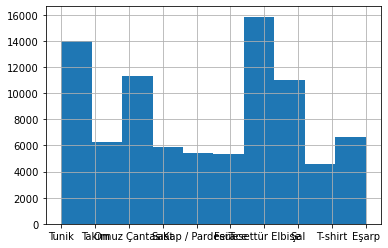

In [8]:
(df['category']).hist()

In [9]:
len(df)

86289

In [10]:
len(np.sort(df['category'].unique()))

10

In [11]:
def append_ext(fn):
    if not '.jpg' in str(fn):
        return str(fn)+".jpg"
    else:
        return str(fn)

#train= df1.iloc[0:10]
df["productid"]=df["productid"].apply(append_ext)
df = df.astype('str')

In [12]:
#MODEL

input_shape=(100,100,3)

model = ResNet50( include_top= False , input_shape= input_shape , classes= 10)

In [13]:
#note: scaling stretch mode minsize:0, aspect ratio 
#learning ratei artır 

SyntaxError: invalid syntax (<ipython-input-13-1652aa557cc9>, line 2)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.2 )

train_generator= datagen.flow_from_dataframe(df, 
                                            directory='C:/Users/IDU/Videos/dataset/',
                                            x_col='productid',
                                            y_col='category',
                                            subset="training",
                                            color_mode='rgb',
                                            target_size= (100,100),
                                            batch_size=32)

test_generator= datagen.flow_from_dataframe(df, 
                                            directory='C:/Users/IDU/Videos/dataset/',
                                            subset="validation",
                                            x_col='productid',
                                            y_col='category',
                                            color_mode='rgb',
                                            target_size= (100,100),
                                            batch_size=32)



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history =model.fit(train_generator, batch_size=32,
                   validation_data=test_generator,
                   epochs=50 )

#step_per_epoch calculation ** try

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model2')

In [19]:
model.save('my_model2.h5')

In [24]:
history.history["val_loss"]

[129564.609375,
 2.591190814971924,
 3.315051555633545,
 2.308523654937744,
 3.1393775939941406,
 2.438875913619995,
 2.442477226257324,
 2.3769843578338623,
 2.487267017364502,
 2.089506149291992,
 1.7599143981933594,
 1.473402976989746,
 1.4518492221832275,
 0.9756888747215271,
 4630.85546875,
 10.598981857299805,
 1.431636095046997,
 0.9578829407691956,
 0.916742205619812,
 1.1560091972351074,
 2.4248738288879395,
 2.689530372619629,
 1.1494841575622559,
 2.178741455078125,
 0.7590429782867432,
 1.5892609357833862,
 1.5310025215148926,
 0.8703489303588867,
 2.255988121032715,
 0.8927680253982544,
 0.9743330478668213,
 0.9347406625747681,
 0.941425621509552,
 0.7459285855293274,
 0.6177475452423096,
 1.0568320751190186,
 0.8938868045806885,
 0.7763593196868896,
 0.5954957604408264,
 0.6373124718666077,
 0.7412757873535156,
 1.3780415058135986,
 1.0436971187591553,
 0.9064262509346008,
 2.249359607696533,
 0.870907723903656,
 0.7244611382484436,
 2.2358014583587646,
 2.225682020187378